In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv("ecommerce_logs.csv")

In [163]:
data.head()

,user_id,action,date_time,product_id,quantity,delivery_price,sex,region,price
0,0,visit,2024-08-20 08:13:59.762204,NaN,NaN,NaN,male,Москва,NaN
1,0,click,2024-08-20 08:17:59.762204,47.0,NaN,NaN,male,Москва,2888.00
2,0,click,2024-08-20 08:19:59.762204,19.0,NaN,NaN,male,Москва,7532.62
3,0,click,2024-08-20 08:22:59.762204,45.0,NaN,NaN,male,Москва,7416.76
4,0,click,2024-08-20 08:14:59.762204,19.0,NaN,NaN,male,Москва,7532.62


In [85]:
#функция для конверсии
def conversion(a,b):
    return b/a

In [151]:
visits = data[(data == 'visit').any(axis=1)].drop_duplicates(subset=['user_id']).shape[0]
clicks = data[(data == 'click').any(axis=1)].drop_duplicates(subset=['user_id']).shape[0]
carts = data[(data == 'cart').any(axis=1)].drop_duplicates(subset=['user_id']).shape[0]
delete = data[(data == 'delete').any(axis=1)].drop_duplicates(subset=['user_id']).shape[0]
purchase = data[(data == 'purchase').any(axis=1)].drop_duplicates(subset=['user_id']).shape[0]

In [155]:
print([
    conversion(visits, clicks),
    conversion(clicks, carts),
    conversion(carts, purchase),
    conversion(visits, carts),
    conversion(visits, purchase)
])

[0.967, 0.9245087900723888, 0.7237136465324385, 0.894, 0.647]


In [141]:
steps = ["visits", "clicks", "carts", "delete", "purchase"]
counts = [visits, clicks, carts, delete, purchase]

Text(0, 0.5, 'кол-во уникальных пользователей')

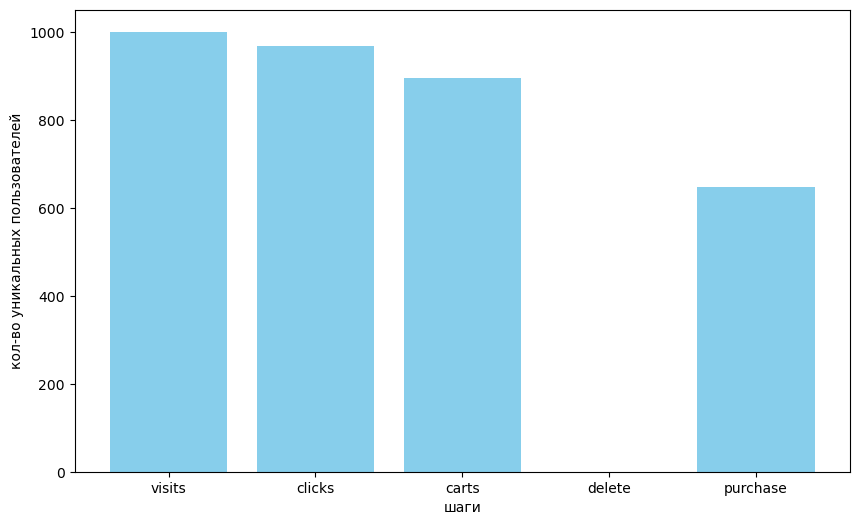

In [145]:
plt.figure(figsize=(10, 6))
plt.bar(steps, counts, color='skyblue')
plt.xlabel('шаги')
plt.ylabel('кол-во уникальных пользователей')

In [ ]:
#самая низка конверсия между нынешним и пред. этапом наблюдается при переходе от добавления товаров в корзину к покупке
#это можно объяснить тем, что пользователи добавляют несколько товаров в корзину за раз
#таким образом, можно добавить в корзину 3 продукта, оформить их как одну покупку и конверсия будет состовлять 1/3,
#не смотря на то, что пользователь купил все товары, добавленные в корзину

In [165]:
df = (pd.merge(data[(data == 'visit').any(axis=1)].drop_duplicates(subset=['user_id']), 
               data[(data == 'click').any(axis=1)].drop_duplicates(subset=['user_id']), on='date_time', how='outer')
        .fillna(0)
        .sort_values('date_time')
        .set_index('date_time'))


In [167]:
df.head()

,user_id_x,action_x,product_id_x,quantity_x,delivery_price_x,sex_x,region_x,price_x,user_id_y,action_y,product_id_y,quantity_y,delivery_price_y,sex_y,region_y,price_y
date_time,,,,,,,,,,,,,,,,
2024-07-22 11:38:59.762204,726.0,visit,0.0,0.0,0.0,male,Новосибирск,0.0,0.0,0,0.0,0.0,0.0,0,0,0.00
2024-07-22 11:46:59.762204,0.0,0,0.0,0.0,0.0,0,0,0.0,726.0,click,26.0,0.0,0.0,male,Новосибирск,3934.49
2024-07-22 13:22:59.762204,0.0,0,0.0,0.0,0.0,0,0,0.0,495.0,click,9.0,0.0,0.0,male,Москва,2451.04
2024-07-22 14:18:59.762204,443.0,visit,0.0,0.0,0.0,female,Москва,0.0,0.0,0,0.0,0.0,0.0,0,0,0.00
2024-07-22 14:23:59.762204,0.0,0,0.0,0.0,0.0,0,0,0.0,443.0,click,15.0,0.0,0.0,female,Москва,1817.61


In [ ]:
plot = df.groupby("col2").plot(kind="bar", title="DataFrameGroupBy Plot")